# Notebook to extract the max of Specific heat

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from src.isingchat import style
from src.isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Global vars
MAIN_DIR="C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat"

unitcell-2_p-1.0_nv-2_h-0.yml
C_V max.: 0.59911452
Temp. at C_V max.: 1.9743039
unitcell-2_p-1.0_nv-3_h-0.yml
C_V max.: 0.68142904
Temp. at C_V max.: 2.625403
unitcell-2_p-1.0_nv-4_h-0.yml
C_V max.: 0.76633944
Temp. at C_V max.: 3.2836834
unitcell-2_p-1.0_nv-5_h-0.yml
C_V max.: 0.82452402
Temp. at C_V max.: 3.7624328
unitcell-2_p-1.0_nv-6_h-0.yml
C_V max.: 0.88197263
Temp. at C_V max.: 4.243576
unitcell-2_p-1.0_nv-7_h-0.yml
C_V max.: 0.92578001
Temp. at C_V max.: 4.6277968
unitcell-2_p-1.0_nv-8_h-0.yml
C_V max.: 0.96872994
Temp. at C_V max.: 5.0155838
unitcell-2_p-1.0_nv-9_h-0.yml
C_V max.: 1.0034382
Temp. at C_V max.: 5.3387396
unitcell-2_p-1.0_nv-10_h-0.yml
C_V max.: 1.0374235
Temp. at C_V max.: 5.6618955
unitcell-2_p-1.0_nv-11_h-0.yml
C_V max.: 1.0659163

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio


Temp. at C_V max.: 5.9428432
unitcell-2_p-1.0_nv-12_h-0.yml
C_V max.: 1.0938222
Temp. at C_V max.: 6.2222765


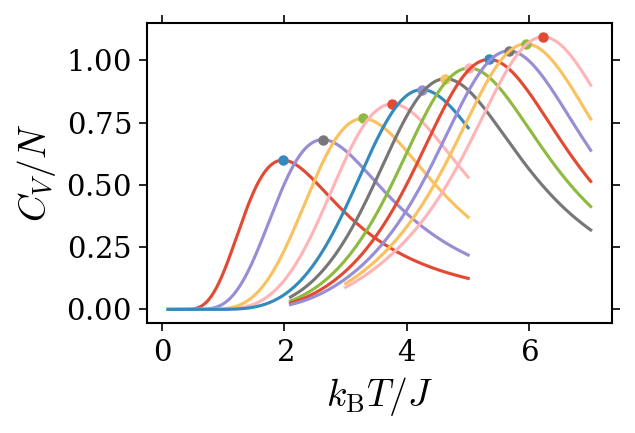

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.1/p_1.0\exp_p-1.0_max_cv.csv
unitcell-2_p-1.1_nv-2_h-0.yml
C_V max.: 0.59831208
Temp. at C_V max.: 1.9671226
unitcell-2_p-1.1_nv-3_h-0.yml
C_V max.: 0.67668247
Temp. at C_V max.: 2.5727406
unitcell-2_p-1.1_nv-4_h-0.yml
C_V max.: 0.75945434
Temp. at C_V max.: 3.1831461
unitcell-2_p-1.1_nv-5_h-0.yml
C_V max.: 0.81525258
Temp. at C_V max.: 3.6116268
unitcell-2_p-1.1_nv-6_h-0.yml
C_V max.: 0.8712064
Temp. at C_V max.: 4.0425012
unitcell-2_p-1.1_nv-7_h-0.yml
C_V max.: 0.91343754
Temp. at C_V max.: 4.3764533
unitcell-2_p-1.1_nv-8_h-0.yml
C_V max.: 0.95534089
Temp. at C_V max.: 4.7115779
unitcell-2_p-1.1_nv-9_h-0.yml
C_V max.: 0.98895586
Temp. at C_V max.: 4.9892526
unitcell-2_p-1.1_nv-10_h-0.yml
C_V max.: 1.0221999
Temp. at C_V max.: 5.2645335
unitcell-2_p-1.1_nv-11_h-0.yml
C_V max.: 1.0499153
Temp. at C_V max.: 5.4992672
unitcell-2_p-1.1_nv-12_h-0.yml
C_V max.:

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

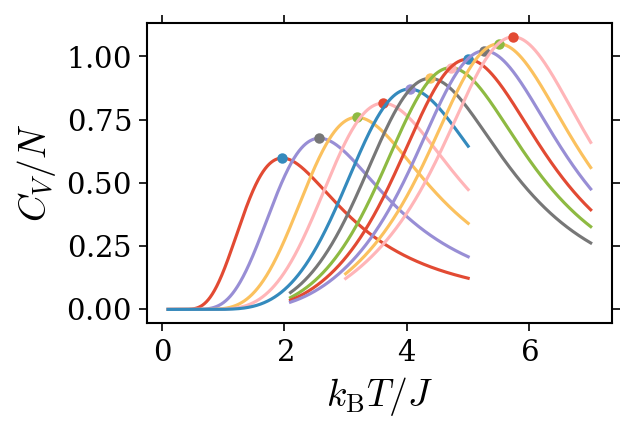

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.1/p_1.1\exp_p-1.1_max_cv.csv
unitcell-2_p-1.5_nv-2_h-0.yml
C_V max.: 0.59510448
Temp. at C_V max.: 1.9288227
unitcell-2_p-1.5_nv-3_h-0.yml
C_V max.: 0.65902322
Temp. at C_V max.: 2.3860283
unitcell-2_p-1.5_nv-4_h-0.yml
C_V max.: 0.73238147
Temp. at C_V max.: 2.8384465
unitcell-2_p-1.5_nv-5_h-0.yml
C_V max.: 0.77842106
Temp. at C_V max.: 3.1137274
unitcell-2_p-1.5_nv-6_h-0.yml
C_V max.: 0.82721457
Temp. at C_V max.: 3.3866146
unitcell-2_p-1.5_nv-7_h-0.yml
C_V max.: 0.86239108
Temp. at C_V max.: 3.5769419
unitcell-2_p-1.5_nv-8_h-0.yml
C_V max.: 0.89883486
Temp. at C_V max.: 3.7684416
unitcell-2_p-1.5_nv-9_h-0.yml
C_V max.: 0.92712076
Temp. at C_V max.: 3.9144602
unitcell-2_p-1.5_nv-10_h-0.yml
C_V max.: 0.95612376
Temp. at C_V max.: 4.0604787
unitcell-2_p-1.5_nv-11_h-0.yml
C_V max.: 0.97969923
Temp. at C_V max.: 4.1753786
unitcell-2_p-1.5_nv-12_h-0.yml
C_V ma

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

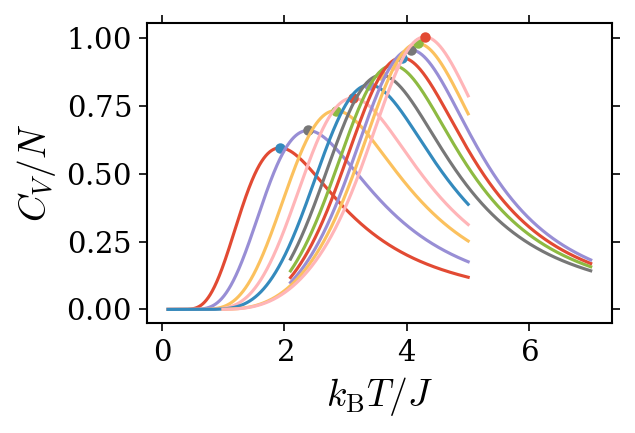

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.1/p_1.5\exp_p-1.5_max_cv.csv
unitcell-2_p-1.9_nv-2_h-0.yml
C_V max.: 0.59190111
Temp. at C_V max.: 1.8929165
unitcell-2_p-1.9_nv-3_h-0.yml
C_V max.: 0.64347027
Temp. at C_V max.: 2.237616
unitcell-2_p-1.9_nv-4_h-0.yml
C_V max.: 0.70666229
Temp. at C_V max.: 2.5727406
unitcell-2_p-1.9_nv-5_h-0.yml
C_V max.: 0.7431499
Temp. at C_V max.: 2.7474841
unitcell-2_p-1.9_nv-6_h-0.yml
C_V max.: 0.78350024
Temp. at C_V max.: 2.9198339
unitcell-2_p-1.9_nv-7_h-0.yml
C_V max.: 0.81098687
Temp. at C_V max.: 3.0263801
unitcell-2_p-1.9_nv-8_h-0.yml
C_V max.: 0.8404023
Temp. at C_V max.: 3.1340987


C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

unitcell-2_p-1.9_nv-9_h-0.yml
C_V max.: 0.86227044
Temp. at C_V max.: 3.2106986
unitcell-2_p-1.9_nv-10_h-0.yml
C_V max.: 0.88529663
Temp. at C_V max.: 3.2849047
unitcell-2_p-1.9_nv-11_h-0.yml
C_V max.: 0.90337679
Temp. at C_V max.: 3.3409868
unitcell-2_p-1.9_nv-12_h-0.yml
C_V max.: 0.92222996
Temp. at C_V max.: 3.395701


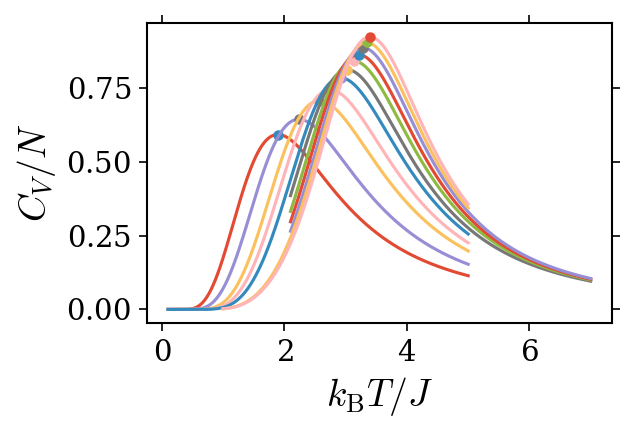

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.1/p_1.9\exp_p-1.9_max_cv.csv
unitcell-2_p-2.0_nv-2_h-0.yml
C_V max.: 0.59110133
Temp. at C_V max.: 1.8857352
unitcell-2_p-2.0_nv-3_h-0.yml
C_V max.: 0.63990125
Temp. at C_V max.: 2.2041036
unitcell-2_p-2.0_nv-4_h-0.yml
C_V max.: 0.70052756
Temp. at C_V max.: 2.5152907
unitcell-2_p-2.0_nv-5_h-0.yml
C_V max.: 0.73474231
Temp. at C_V max.: 2.6708842
unitcell-2_p-2.0_nv-6_h-0.yml
C_V max.: 0.77290172
Temp. at C_V max.: 2.824084
unitcell-2_p-2.0_nv-7_h-0.yml
C_V max.: 0.79847847
Temp. at C_V max.: 2.9186615
unitcell-2_p-2.0_nv-8_h-0.yml
C_V max.: 0.82601649
Temp. at C_V max.: 3.0120176
unitcell-2_p-2.0_nv-9_h-0.yml
C_V max.: 0.8462297
Temp. at C_V max.: 3.074255
unitcell-2_p-2.0_nv-10_h-0.yml
C_V max.: 0.8676128
Temp. at C_V max.: 3.1364924
unitcell-2_p-2.0_nv-11_h-0.yml
C_V max.: 0.88422588
Temp. at C_V max.: 3.1827064
unitcell-2_p-2.0_nv-12_h-0.yml
C_V max.: 

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

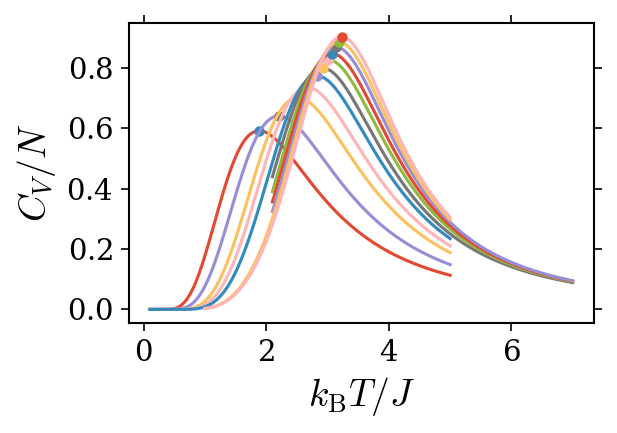

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.1/p_2.0\exp_p-2.0_max_cv.csv
unitcell-2_p-1.0_nv-2_h-0.yml
C_V max.: 0.6030318
Temp. at C_V max.: 2.0221788
unitcell-2_p-1.0_nv-3_h-0.yml
C_V max.: 0.68372623
Temp. at C_V max.: 2.6876404
unitcell-2_p-1.0_nv-4_h-0.yml
C_V max.: 0.76927046
Temp. at C_V max.: 3.3746458
unitcell-2_p-1.0_nv-5_h-0.yml
C_V max.: 0.82683835
Temp. at C_V max.: 3.8701514
unitcell-2_p-1.0_nv-6_h-0.yml
C_V max.: 0.8845736
Temp. at C_V max.: 4.3728383
unitcell-2_p-1.0_nv-7_h-0.yml
C_V max.: 0.92803884
Temp. at C_V max.: 4.7714216
unitcell-2_p-1.0_nv-8_h-0.yml
C_V max.: 0.97113189
Temp. at C_V max.: 5.1759648
unitcell-2_p-1.0_nv-9_h-0.yml
C_V max.: 1.0056109
Temp. at C_V max.: 5.5110894
unitcell-2_p-1.0_nv-10_h-0.yml
C_V max.: 1.0396685
Temp. at C_V max.: 5.8510015
unitcell-2_p-1.0_nv-11_h-0.yml
C_V max.: 1.0679909
Temp. at C_V max.: 6.1402052
unitcell-2_p-1.0_nv-12_h-0.yml
C_V max.: 1

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

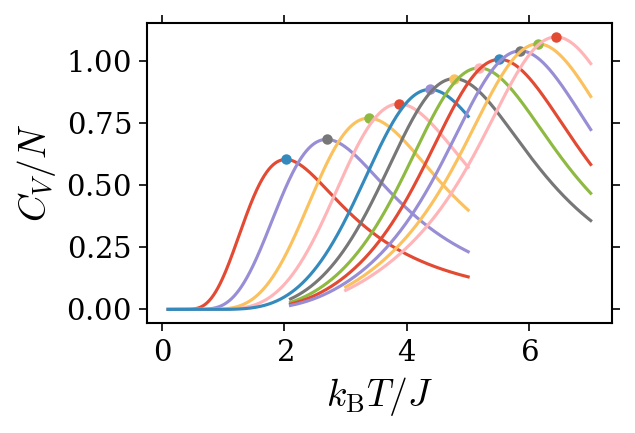

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.05/p_1.0\exp_p-1.0_max_cv.csv
unitcell-2_p-1.1_nv-2_h-0.yml
C_V max.: 0.60262108
Temp. at C_V max.: 2.0173913
unitcell-2_p-1.1_nv-3_h-0.yml
C_V max.: 0.67929283
Temp. at C_V max.: 2.6397655
unitcell-2_p-1.1_nv-4_h-0.yml
C_V max.: 0.76274664
Temp. at C_V max.: 3.2812897
unitcell-2_p-1.1_nv-5_h-0.yml
C_V max.: 0.81790505
Temp. at C_V max.: 3.7241329
unitcell-2_p-1.1_nv-6_h-0.yml
C_V max.: 0.87417537
Temp. at C_V max.: 4.1765511
unitcell-2_p-1.1_nv-7_h-0.yml
C_V max.: 0.91605407
Temp. at C_V max.: 4.5224719
unitcell-2_p-1.1_nv-8_h-0.yml
C_V max.: 0.95812076
Temp. at C_V max.: 4.8767465
unitcell-2_p-1.1_nv-9_h-0.yml
C_V max.: 0.99150125
Temp. at C_V max.: 5.1639961
unitcell-2_p-1.1_nv-10_h-0.yml
C_V max.: 1.0248302
Temp. at C_V max.: 5.4536395
unitcell-2_p-1.1_nv-11_h-0.yml
C_V max.: 1.0523708
Temp. at C_V max.: 5.6985833
unitcell-2_p-1.1_nv-12_h-0.yml
C_V max

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

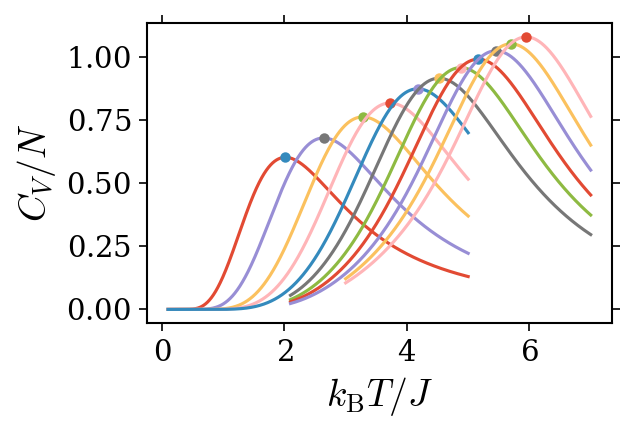

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.05/p_1.1\exp_p-1.1_max_cv.csv
unitcell-2_p-1.5_nv-2_h-0.yml
C_V max.: 0.6009777
Temp. at C_V max.: 1.9982413
unitcell-2_p-1.5_nv-3_h-0.yml
C_V max.: 0.66301123
Temp. at C_V max.: 2.4698095
unitcell-2_p-1.5_nv-4_h-0.yml
C_V max.: 0.7372218
Temp. at C_V max.: 2.9533464
unitcell-2_p-1.5_nv-5_h-0.yml
C_V max.: 0.78260193
Temp. at C_V max.: 3.240596
unitcell-2_p-1.5_nv-6_h-0.yml
C_V max.: 0.83183723
Temp. at C_V max.: 3.5350269
unitcell-2_p-1.5_nv-7_h-0.yml
C_V max.: 0.86668323
Temp. at C_V max.: 3.7349292
unitcell-2_p-1.5_nv-8_h-0.yml
C_V max.: 0.90339087
Temp. at C_V max.: 3.9407914
unitcell-2_p-1.5_nv-9_h-0.yml
C_V max.: 0.93147263
Temp. at C_V max.: 4.0939912
unitcell-2_p-1.5_nv-10_h-0.yml
C_V max.: 0.96064279
Temp. at C_V max.: 4.2495848
unitcell-2_p-1.5_nv-11_h-0.yml
C_V max.: 0.98407538
Temp. at C_V max.: 4.3727406
unitcell-2_p-1.5_nv-12_h-0.yml
C_V max.

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

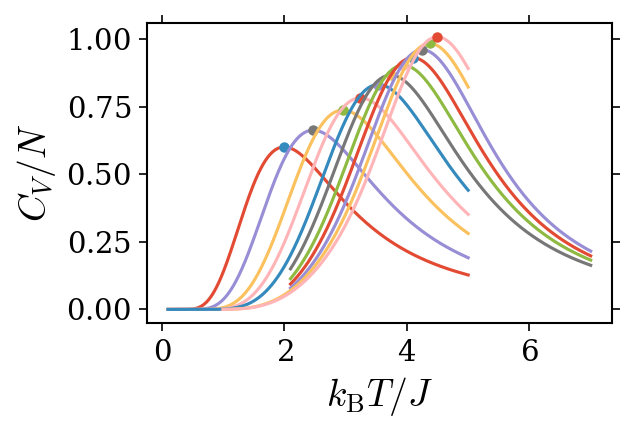

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.05/p_1.5\exp_p-1.5_max_cv.csv
unitcell-2_p-1.9_nv-2_h-0.yml
C_V max.: 0.59933417
Temp. at C_V max.: 1.9790914
unitcell-2_p-1.9_nv-3_h-0.yml
C_V max.: 0.64899865
Temp. at C_V max.: 2.3357596
unitcell-2_p-1.9_nv-4_h-0.yml
C_V max.: 0.71317914
Temp. at C_V max.: 2.7020029
unitcell-2_p-1.9_nv-5_h-0.yml
C_V max.: 0.74908208
Temp. at C_V max.: 2.8863214
unitcell-2_p-1.9_nv-6_h-0.yml
C_V max.: 0.78999716
Temp. at C_V max.: 3.0754275
unitcell-2_p-1.9_nv-7_h-0.yml
C_V max.: 0.81725167
Temp. at C_V max.: 3.1915486
unitcell-2_p-1.9_nv-8_h-0.yml
C_V max.: 0.84704872
Temp. at C_V max.: 3.3088422
unitcell-2_p-1.9_nv-9_h-0.yml
C_V max.: 0.86881569
Temp. at C_V max.: 3.3902296
unitcell-2_p-1.9_nv-10_h-0.yml
C_V max.: 0.89212292
Temp. at C_V max.: 3.471617
unitcell-2_p-1.9_nv-11_h-0.yml
C_V max.: 0.91016247
Temp. at C_V max.: 3.5305325
unitcell-2_p-1.9_nv-12_h-0.yml
C_V ma

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

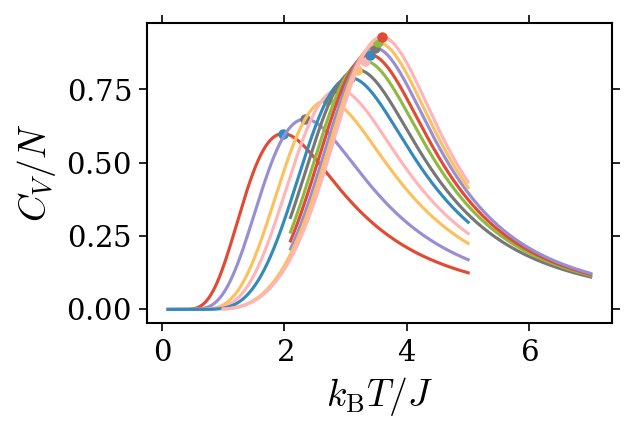

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.05/p_1.9\exp_p-1.9_max_cv.csv
unitcell-2_p-2.0_nv-2_h-0.yml
C_V max.: 0.59892335
Temp. at C_V max.: 1.9743039
unitcell-2_p-2.0_nv-3_h-0.yml
C_V max.: 0.64583314
Temp. at C_V max.: 2.3070347
unitcell-2_p-2.0_nv-4_h-0.yml
C_V max.: 0.70747658
Temp. at C_V max.: 2.6469468
unitcell-2_p-2.0_nv-5_h-0.yml
C_V max.: 0.74113465
Temp. at C_V max.: 2.814509
unitcell-2_p-2.0_nv-6_h-0.yml
C_V max.: 0.77988595
Temp. at C_V max.: 2.9820713
unitcell-2_p-2.0_nv-7_h-0.yml
C_V max.: 0.80526067
Temp. at C_V max.: 3.08383
unitcell-2_p-2.0_nv-8_h-0.yml
C_V max.: 0.83320864
Temp. at C_V max.: 3.1843674
unitcell-2_p-2.0_nv-9_h-0.yml
C_V max.: 0.85335164
Temp. at C_V max.: 3.253786
unitcell-2_p-2.0_nv-10_h-0.yml
C_V max.: 0.87504278
Temp. at C_V max.: 3.3232047
unitcell-2_p-2.0_nv-11_h-0.yml
C_V max.: 0.89164562
Temp. at C_V max.: 3.3722521
unitcell-2_p-2.0_nv-12_h-0.yml
C_V max.:

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

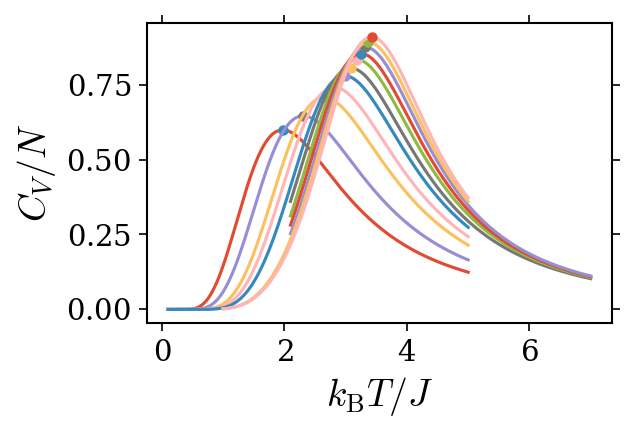

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.05/p_2.0\exp_p-2.0_max_cv.csv
unitcell-2_p-1.0_nv-2_h-0.yml
C_V max.: 0.58837647
Temp. at C_V max.: 1.8546165
unitcell-2_p-1.0_nv-3_h-0.yml
C_V max.: 0.67473974
Temp. at C_V max.: 2.465022
unitcell-2_p-1.0_nv-4_h-0.yml
C_V max.: 0.75792823
Temp. at C_V max.: 3.0467025
unitcell-2_p-1.0_nv-5_h-0.yml
C_V max.: 0.81769161
Temp. at C_V max.: 3.4847582
unitcell-2_p-1.0_nv-6_h-0.yml
C_V max.: 0.87441152
Temp. at C_V max.: 3.9108451
unitcell-2_p-1.0_nv-7_h-0.yml
C_V max.: 0.91911552
Temp. at C_V max.: 4.2591597
unitcell-2_p-1.0_nv-8_h-0.yml
C_V max.: 0.96172482
Temp. at C_V max.: 4.6014656
unitcell-2_p-1.0_nv-9_h-0.yml
C_V max.: 0.99704613
Temp. at C_V max.: 4.8935027
unitcell-2_p-1.0_nv-10_h-0.yml
C_V max.: 1.0308757
Temp. at C_V max.: 5.1807523
unitcell-2_p-1.0_nv-11_h-0.yml
C_V max.: 1.059832
Temp. at C_V max.: 5.4328285
unitcell-2_p-1.0_nv-12_h-0.yml
C_V max.:

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

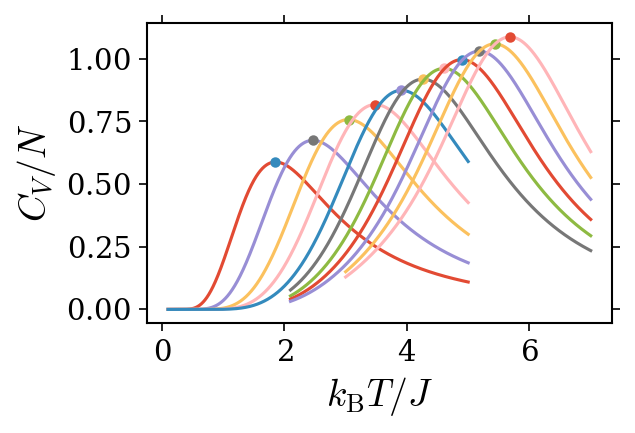

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.25/p_1.0\exp_p-1.0_max_cv.csv
unitcell-2_p-1.1_nv-2_h-0.yml
C_V max.: 0.58651181
Temp. at C_V max.: 1.8354665
unitcell-2_p-1.1_nv-3_h-0.yml
C_V max.: 0.66908869
Temp. at C_V max.: 2.4003908
unitcell-2_p-1.1_nv-4_h-0.yml
C_V max.: 0.74998272
Temp. at C_V max.: 2.9341964
unitcell-2_p-1.1_nv-5_h-0.yml
C_V max.: 0.80740197
Temp. at C_V max.: 3.3219834
unitcell-2_p-1.1_nv-6_h-0.yml
C_V max.: 0.86253804
Temp. at C_V max.: 3.6978017
unitcell-2_p-1.1_nv-7_h-0.yml
C_V max.: 0.90568073
Temp. at C_V max.: 4.0006351
unitcell-2_p-1.1_nv-8_h-0.yml
C_V max.: 0.94718702
Temp. at C_V max.: 4.2926722
unitcell-2_p-1.1_nv-9_h-0.yml
C_V max.: 0.98142525
Temp. at C_V max.: 4.5392281
unitcell-2_p-1.1_nv-10_h-0.yml
C_V max.: 1.0144766
Temp. at C_V max.: 4.7809966
unitcell-2_p-1.1_nv-11_h-0.yml
C_V max.: 1.0426659
Temp. at C_V max.: 4.9912066
unitcell-2_p-1.1_nv-12_h-0.yml
C_V max

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

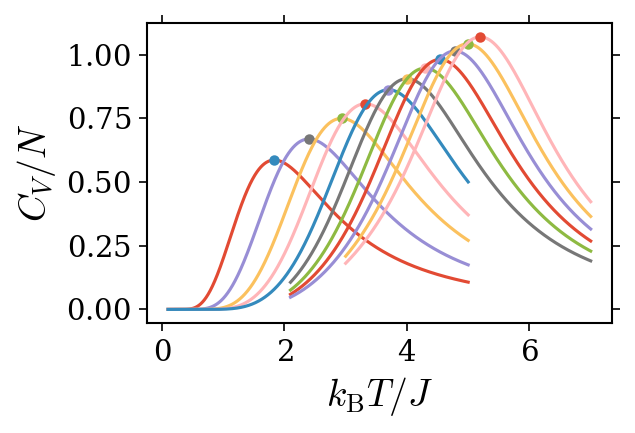

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.25/p_1.1\exp_p-1.1_max_cv.csv
unitcell-2_p-1.5_nv-2_h-0.yml
C_V max.: 0.57909933
Temp. at C_V max.: 1.7612604
unitcell-2_p-1.5_nv-3_h-0.yml
C_V max.: 0.64749609
Temp. at C_V max.: 2.1753786
unitcell-2_p-1.5_nv-4_h-0.yml
C_V max.: 0.71836122
Temp. at C_V max.: 2.5511969
unitcell-2_p-1.5_nv-5_h-0.yml
C_V max.: 0.76596472
Temp. at C_V max.: 2.7929653
unitcell-2_p-1.5_nv-6_h-0.yml
C_V max.: 0.81352695
Temp. at C_V max.: 3.0179775
unitcell-2_p-1.5_nv-7_h-0.yml
C_V max.: 0.84948988
Temp. at C_V max.: 3.1843674
unitcell-2_p-1.5_nv-8_h-0.yml
C_V max.: 0.88521733
Temp. at C_V max.: 3.3447484
unitcell-2_p-1.5_nv-9_h-0.yml
C_V max.: 0.91399381
Temp. at C_V max.: 3.4692233
unitcell-2_p-1.5_nv-10_h-0.yml
C_V max.: 0.94255094
Temp. at C_V max.: 3.5889106
unitcell-2_p-1.5_nv-11_h-0.yml
C_V max.: 0.96647873
Temp. at C_V max.: 3.6888129
unitcell-2_p-1.5_nv-12_h-0.yml
C_V m

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

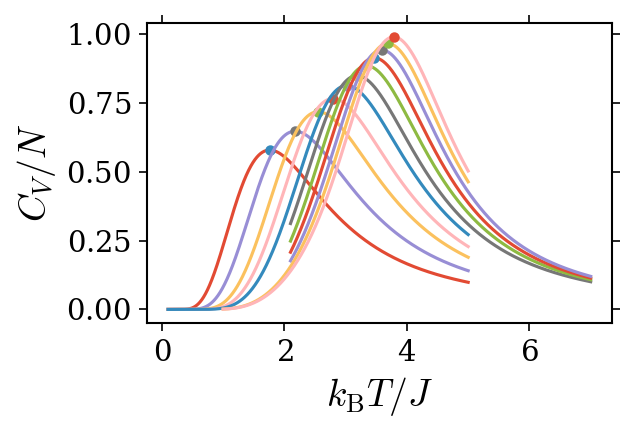

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.25/p_1.5\exp_p-1.5_max_cv.csv
unitcell-2_p-1.9_nv-2_h-0.yml
C_V max.: 0.57178702
Temp. at C_V max.: 1.6918417
unitcell-2_p-1.9_nv-3_h-0.yml
C_V max.: 0.62764909
Temp. at C_V max.: 1.9958476
unitcell-2_p-1.9_nv-4_h-0.yml
C_V max.: 0.68777639
Temp. at C_V max.: 2.2615535
unitcell-2_p-1.9_nv-5_h-0.yml
C_V max.: 0.72548974
Temp. at C_V max.: 2.4075721
unitcell-2_p-1.9_nv-6_h-0.yml
C_V max.: 0.76416509
Temp. at C_V max.: 2.5440156
unitcell-2_p-1.9_nv-7_h-0.yml
C_V max.: 0.79207456
Temp. at C_V max.: 2.6338056
unitcell-2_p-1.9_nv-8_h-0.yml
C_V max.: 0.8203702
Temp. at C_V max.: 2.7175867
unitcell-2_p-1.9_nv-9_h-0.yml
C_V max.: 0.84236874
Temp. at C_V max.: 2.7798241
unitcell-2_p-1.9_nv-10_h-0.yml
C_V max.: 0.86457158
Temp. at C_V max.: 2.8372741
unitcell-2_p-1.9_nv-11_h-0.yml
C_V max.: 0.88265703
Temp. at C_V max.: 2.8817782
unitcell-2_p-1.9_nv-12_h-0.yml
C_V ma

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

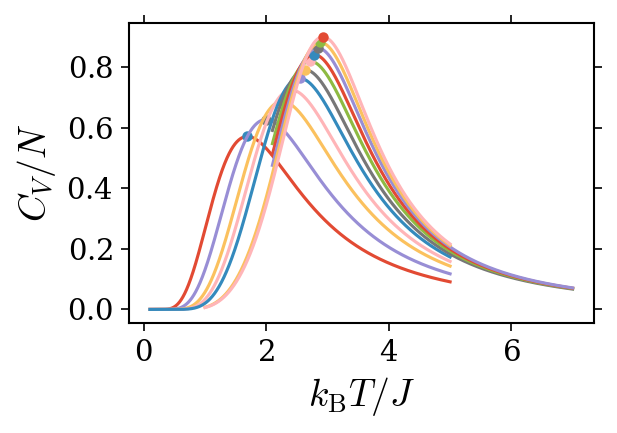

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.25/p_1.9\exp_p-1.9_max_cv.csv
unitcell-2_p-2.0_nv-2_h-0.yml
C_V max.: 0.56997842
Temp. at C_V max.: 1.6750855
unitcell-2_p-2.0_nv-3_h-0.yml
C_V max.: 0.622973
Temp. at C_V max.: 1.9551539
unitcell-2_p-2.0_nv-4_h-0.yml
C_V max.: 0.68040633
Temp. at C_V max.: 2.1993161
unitcell-2_p-2.0_nv-5_h-0.yml
C_V max.: 0.71573584
Temp. at C_V max.: 2.3285784
unitcell-2_p-2.0_nv-6_h-0.yml
C_V max.: 0.75211937
Temp. at C_V max.: 2.4482658
unitcell-2_p-2.0_nv-7_h-0.yml
C_V max.: 0.7780106
Temp. at C_V max.: 2.526087
unitcell-2_p-2.0_nv-8_h-0.yml
C_V max.: 0.80433503
Temp. at C_V max.: 2.5955056
unitcell-2_p-2.0_nv-9_h-0.yml
C_V max.: 0.82457679
Temp. at C_V max.: 2.6481681
unitcell-2_p-2.0_nv-10_h-0.yml
C_V max.: 0.84504641
Temp. at C_V max.: 2.696043
unitcell-2_p-2.0_nv-11_h-0.yml
C_V max.: 0.86156616
Temp. at C_V max.: 2.7313141
unitcell-2_p-2.0_nv-12_h-0.yml
C_V max.: 

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

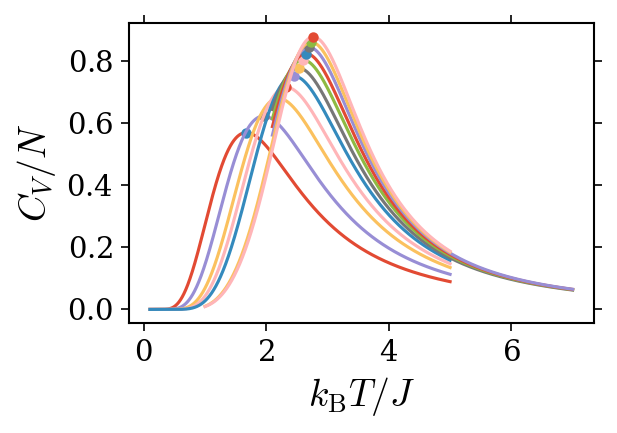

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\./data/imperfect/infinite-size/unitcell_2/ratio_0.25/p_2.0\exp_p-2.0_max_cv.csv
unitcell-2_p-1.0_nv-2_h-0.yml
C_V max.: 0.57329309
Temp. at C_V max.: 1.7062042
unitcell-2_p-1.0_nv-3_h-0.yml
C_V max.: 0.66424244
Temp. at C_V max.: 2.2591597
unitcell-2_p-1.0_nv-4_h-0.yml
C_V max.: 0.74499802
Temp. at C_V max.: 2.7450904
unitcell-2_p-1.0_nv-5_h-0.yml
C_V max.: 0.80669885
Temp. at C_V max.: 3.1304836
unitcell-2_p-1.0_nv-6_h-0.yml
C_V max.: 0.86250516
Temp. at C_V max.: 3.4895457
unitcell-2_p-1.0_nv-7_h-0.yml
C_V max.: 0.90837824
Temp. at C_V max.: 3.7935515
unitcell-2_p-1.0_nv-8_h-0.yml
C_V max.: 0.95061906
Temp. at C_V max.: 4.0784074
unitcell-2_p-1.0_nv-9_h-0.yml
C_V max.: 0.9867784
Temp. at C_V max.: 4.3321446
unitcell-2_p-1.0_nv-10_h-0.yml
C_V max.: 1.0204862
Temp. at C_V max.: 4.5715193
unitcell-2_p-1.0_nv-11_h-0.yml


C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecatio

OSError: Unable to open file (unable to open file: name = 'C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\data\imperfect\infinite-size\unitcell_2\ratio_0.5\p_1.0\unitcell-2_p-1.0_nv-11_h-0.free-energy.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

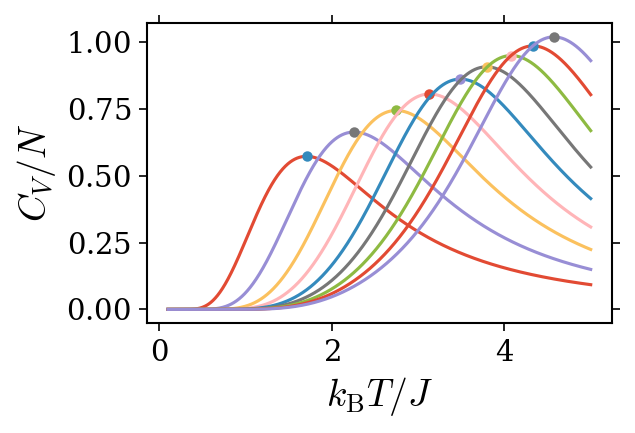

In [4]:
import os

ratios = [0.1,0.05,0.25,0.5,0.75,1.25,1.5,1.75,2]
list_exp_p = [1.0,1.1,1.5,1.9,2.0]
list_nv = [2,3,4,5,6,7,8,9,10,11,12]
all_max_cv = {}
for ratio in ratios:
    for exp_p in list_exp_p:
        all_max_cv[exp_p] = {}
        data_path = os.path.join(MAIN_DIR,"./data/imperfect/infinite-size/unitcell_2/ratio_{}/p_{}".format(ratio,exp_p))

        use_tex = False

        # Load the default style.
        style.use("default")
        rcParams["text.usetex"] = use_tex

        fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
        grid_spec = GridSpec(3, 1)

        for nv in list_nv:
            try:
                file = 'unitcell-2_p-{}_nv-{}_h-0.yml'.format(exp_p,nv)
                config_file = Path(os.path.join(data_path,file)).resolve()
                energy_file = config_file.with_suffix(".free-energy.h5")
                print(file)

                with config_file.open() as cfp:
                    config_info = yaml.load(cfp)
                config_data = read_ising_config(config_info)

                with h5py.File(str(energy_file)) as h5fp:
                    data_energy = h5fp["/free-energy"][()]

                temp = config_data["system"]["temperature"]
                mag_field = config_data["system"]["magnetic_field"]
                free_erg = data_energy[:, :]

                # Zero magnetic field spline
                free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                                           free_erg[:, 0],
                                                           s=0, k=4)
                temp_fine = np.linspace(temp.min(), temp.max(), 2048)

                # Second derivative of the free energy.
                free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
                cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
                cv_max_idx = np.argmax(cv_fine)
                temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

                print(f"C_V max.: {cv_max:.8G}")
                print(f"Temp. at C_V max.: {temp_cv_max:.8G}")
                all_max_cv[exp_p][nv] = {
                    'max_Cv': cv_max,
                    'temp_at_max_Cv': temp_cv_max
                }


                # Specific heat subplot.
                ax: Axes = fig1.add_subplot(grid_spec[0, 0])

                ax.plot(temp_fine, cv_fine, lw=1.5)
                ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

                ax.set_xlabel(r"$k_\mathrm{B} T / J$")
                ax.set_ylabel(r"$C_V / N$")

            except KeyError:
                print('error with this file {}'.format(file))

        pyplot.draw()
        pyplot.show()

        # Export to pandas 
        file_export_max = os.path.join(data_path,'exp_p-{}_max_cv.csv'.format(exp_p))
#         if os.path.isfile(file_export_max):
#             df_original = pd.read_csv(file_export_max,index_col=0)
#             df = pd.DataFrame(all_max_cv[exp_p])
#             df.loc['inv_temp_at_max_Cv'] = 1/df.loc['temp_at_max_Cv']
#             df = df.reindex(sorted(df.columns), axis=1)
#             df_result = df.merge(right=df_original)
#             print('Merge file {}'.format(file_export_max))
#             break
#         else:            
        print('Exporting data to {}'.format(file_export_max))
        df = pd.DataFrame(all_max_cv[exp_p])
        df.loc['inv_temp_at_max_Cv'] = 1/df.loc['temp_at_max_Cv']
        df = df.reindex(sorted(df.columns), axis=1)
        df.to_csv(file_export_max)


In [33]:
df_original.columns.values
df_original.loc['temp_at_max_Cv']

2     1.854617
3     2.465022
4     3.046702
5     3.484758
6     3.910845
7     4.260332
8     4.602638
9     4.894675
10    5.000000
Name: temp_at_max_Cv, dtype: float64

In [32]:
data_path

'C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\./data/imperfect/infinite-size/unitcell_2/ratio_2/p_2.0'